In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

from ipywidgets import Output

import pyneuralnet as pn

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [1321]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


Progress: [####################] 100.0%



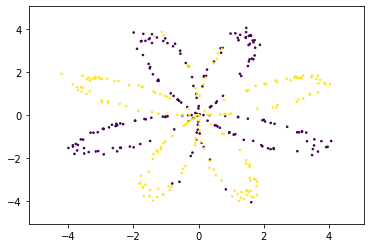

[[0.5]] [[0.]] [[0.]]


In [2226]:
np.random.seed(1)
layout = ((4, 'tanh'),
          (1, 'sigmoid'),
         ) 

network = pn.buildNetwork(layout, X.shape[0])
network[0].W *= 10
network[1].W *= 10

num_iterations = 40
learning_rate = 1

newtork, costs, accs = pn.gradientDescent(X, Y, network, num_iterations, learning_rate,
                        costfunction='logistic', showprogress=True, showmsg=True,
                                         debugmsg='first.dW')


pn.plot2DBoundary(X, Y, network)
H = pn.predict(X, network)
acc, prec, rec = pn.evaluateModel(H, Y)
print(acc, prec, rec)

In [13]:
print(network[0].W)
print(network[0].b)

[[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207]]
[[ 4.36384170e-09]
 [-3.41288675e-09]
 [ 1.99741456e-08]
 [-2.81721373e-08]]


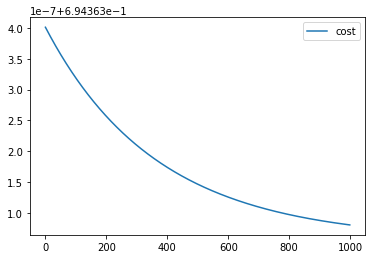

In [31]:
plt.plot(costs, label='cost')
# plt.plot(accs, label='accuracy')
plt.legend()
plt.show()

In [ ]:
model2 = np.copy(network)

In [ ]:
#model, model2

H = pn.predict(X, model)
acc, prec, rec = evaluateModel(H, Y)
print(acc, prec, rec)

In [1709]:
np.random.seed(1)
# layout = ((1, 'sigmoid'),
#          )
layout = ((4, 'tanh'),
          (1, 'sigmoid'),
         ) 

network = pn.buildNetwork(layout, X.shape[0])
network[0].W *= 10
network[1].W *= 10
# X = np.array([[-0.2, 0.3, 0.8, 0.1]])
# Y = np.array([[1, 0, 0, 1]])
learning_rate = 1

network = pn.buildNetwork(layout, X.shape[0])
print('W:', network[0].W, '\nb:', network[0].b,
      '\nZ:', network[0].Z, '\nA:', network[0].A,
     '\ndW:', network[0].dW, '\ndb:', network[0].db,
      '\ndZ:', network[0].dZ, '\ndA:', network[0].dA)

Layer 1: (4, 'tanh')
Layer 2 : (1, 'sigmoid')
Layer 1: (4, 'tanh')
Layer 2 : (1, 'sigmoid')
W: [[-0.00322417 -0.00384054]
 [ 0.01133769 -0.01099891]
 [-0.00172428 -0.00877858]
 [ 0.00042214  0.00582815]] 
b: [[0.]
 [0.]
 [0.]
 [0.]] 
Z: [[0.]
 [0.]
 [0.]
 [0.]] 
A: [[0.]
 [0.]
 [0.]
 [0.]] 
dW: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
db: [[0.]
 [0.]
 [0.]
 [0.]] 
dZ: [[0.]
 [0.]
 [0.]
 [0.]] 
dA: [[0.]
 [0.]
 [0.]
 [0.]]


In [2220]:
pn.forwardprop(X, network)
cost, grad = pn.computeCost(Y, network, costfunc='logistic')
print(cost, grad[0, 0])
pn.backprop(grad, X, network)
print('W:', network[0].W[0, 0], '\nb:', network[0].b[0, 0],
  '\nZ:', network[0].Z[0, 0], '\nA:', network[0].A[0, 0],
 '\ndW:', network[0].dW[0, 0], '\ndb:', network[0].db[0, 0],
  '\ndZ:', network[0].dZ[0, 0], '\ndA:', network[0].dA[0, 0])
print('\n')
network[0].update(learning_rate)

[[0.69063584]] 1.9764128596803994
W: -0.8676774817485831 
b: 0.110818162935905 
Z: 0.7290702499939505 
A: 0.6224962086793161 
dW: 0.009031432318172767 
db: -0.0013818535421705825 
dZ: -0.002547195213888859 
dA: -0.005437420187679496




In [15]:
pn.sigmoid(-0.00324869)

0.499187828214304

In [22]:
for i in range(3):
    print('Epoch', i)
    pn.forwardprop(X, network)
    cost, grad = pn.computeCost(Y, network, costfunc='logistic')
    print(cost, grad)
    pn.backprop(grad, X, network)
    print('W:', network[0].W, '\nb:', network[0].b,
      '\nZ:', network[0].Z, '\nA:', network[0].A,
     '\ndW:', network[0].dW, '\ndb:', network[0].db,
      '\ndZ:', network[0].dZ, '\ndA:', network[0].dA)
    print('\n')
    network[0].update(learning_rate)
 

Epoch 0
[[0.69559013]] [[-2.00325397  2.00488493  2.01307956 -1.99837697]]
W: [[0.01624345]] 
b: [[0.]] 
Z: [[-0.00324869  0.00487304  0.01299476  0.00162435]] 
A: [[0.49918783 0.50121826 0.50324865 0.50040609]] 
dW: [[0.15079186]] 
db: [[0.0010152]] 
dZ: [[-0.50081217  0.50121826  0.50324865 -0.49959391]] 
dA: [[-2.00325397  2.00488493  2.01307956 -1.99837697]]


Epoch 1
[[0.6843615]] [[-1.98874097  1.98191224  1.95329623 -2.00644352]]
W: [[-0.05915248]] 
b: [[-0.0005076]] 
Z: [[ 0.01132289 -0.01825334 -0.04782958 -0.00642285]] 
A: [[0.50283069 0.49543679 0.48804488 0.49839429]] 
dW: [[0.14708506]] 
db: [[-0.00382333]] 
dZ: [[-0.49716931  0.49543679  0.48804488 -0.50160571]] 
dA: [[-1.98874097  1.98191224  1.95329623 -2.00644352]]


Epoch 2
[[0.67366057]] [[-1.97244373  1.96232366  1.90054789 -2.01193611]]
W: [[-0.13269501]] 
b: [[0.00140407]] 
Z: [[ 0.02794307 -0.03840444 -0.10475194 -0.01186544]] 
A: [[0.50698531 0.49040007 0.47383594 0.49703368]] 
dW: [[0.14362377]] 
db: [[-0.00793

In [25]:
a = np.array([[0.4990666,  0.50108108, 0.50309553, 0.50027529]])
b = a * (1 - a) * 0.00353824
print(b)

[[0.00088456 0.00088456 0.00088453 0.00088456]]


## Gradient Checking Tool


In [ ]:
def function(H, Y):
    m = H.shape[1]
    return -1 / m * (Y @ np.log(H.T) + (1 - Y) @ np.log(1 - H.T))

def gradient(H, Y):
    m = H.shape[1]
    return 1 / m * np.sum(np.divide(-Y, H) + np.divide(1 - Y, 1 - H), keepdims=True)

def function2(H, Y):
    m = H.shape[1]
    return -1 / m * np.sum(np.multiply(np.log(H), Y) + np.multiply((1 - Y), np.log(1 - H)), keepdims=True)

def gradient2(H, Y):
    m = H.shape[1]
    return 1 / m * np.sum(np.divide((H - Y), H * (1 - H)), keepdims=True) 

np.random.seed(20)
Z = np.random.rand(1, 3)
print('Input\n', Z, '\n')

Y = np.array([[0, 1, 1]])
print('Correct Answer\n', Y, '\n')

A = function(Z, Y)
print('Output\n', A, '\n')
A = function2(Z, Y)
print('Output 2\n', A, '\n')

dAdZ = gradient(Z, Y)
print('Gradient\n', dAdZ, '\n')

eps = 1e-5
plus = function(Z + eps, Y)
minus = function(Z - eps, Y)
dAdZ_check = (plus - minus) / (2 * eps)
print('Gradient Check\n', dAdZ_check)


dAdZ = gradient2(Z, Y)
print('\nGradient 2\n', dAdZ, '\n')

eps = 1e-5
plus = function2(Z + eps, Y)
minus = function2(Z - eps, Y)
dAdZ_check = (plus - minus) / (2 * eps)
print('Gradient 2 Check\n', dAdZ_check)

In [ ]:
Z

## Make fake data

In [ ]:
import csv

f = 'tests/linear3.csv'

def makeFakeData_LinearBoundary(f):

    b = 0.23
    a1 = 0.1
    a2 = 0.5

    with open(f, 'w') as csvFile:
        writer = csv.writer(csvFile)
        for i in range(50):
            for j in range(20):
                x1 = round(float(np.random.randn(1)), 2)
                x2 = round(float(np.random.randn(1)), 2)
                y = 1*((a2*x2) > (a1*x1 + b)) 
                inp = [x1, x2, y]
#                 print(inp)
                writer.writerow(inp)

    csvFile.close()

makeFakeData_LinearBoundary(f)

In [ ]:
np.where()

In [ ]:
a = [[2, 3, 4], [2, 1, 4]]
print(*a)

## Function testing

In [14]:
import time
H = network[-1].A
m = Y.shape[1]
Y = Y.astype('float32')

start = time.time()
J1 = -1 / m * (Y @ np.log(H.T) + (1 - Y) @ np.log(1 - H.T))
d1 = time.time() - start

start = time.time()
J2 = -1 / m * np.sum(np.multiply(Y, np.log(H)) + np.multiply((1 - Y), np.log(1 - H)), keepdims=True)
d2 = time.time() - start

start = time.time()
grad1 = 1 / m * np.sum(np.divide(-Y, H) + np.divide(1 - Y, 1 - H), keepdims=True)
g1 = time.time() - start

start = time.time()
grad2 = 1 / m * np.sum(np.divide((H - Y), np.multiply(H, (1 - H))), keepdims=True)
g2 = time.time() - start

start = time.time()
grad3 = 1 / m * np.sum((-Y / H) + (1 - Y) / (1 - H), keepdims=True)
g3 = time.time() - start

start = time.time()
grad4 = 1 / m * np.sum((H - Y) / (H * (1 - H)), keepdims=True)
g4 = time.time() - start

print(J1, J2)
print(grad1, grad2, grad3, grad4)
print('\n\nCost Times:', d1, d2)
print('Grad Times:', g1, g2, g3, g4)

[[0.69311725]] [[0.69311725]]
[[-4.56464692e-06]] [[-4.56464692e-06]] [[-4.56464692e-06]] [[-4.56464692e-06]]


Cost Times: 0.0 0.0
Grad Times: 0.0 0.0 0.0 0.0


In [ ]:
h = np.array([[1, 0, 1, 0, 1]])
y = np.array([[1, 1, 0, 0, 0]])
a, p, r = evaluateModel(h, y)
print(a, '\n\n', p, '\n\n', r)

In [ ]:
np.random.seed(1)
layout = ((1, 'sigmoid'),) 
x = np.random.rand(1,1)
y = np.array([[1]])
print(x)

network = buildNetwork(layout, x.shape[0])